In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [2]:
df_cancer=pd.read_csv('breast-cancer-data.csv')

In [3]:
df_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df_cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [5]:
feature_names=np.asarray(['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'])

In [6]:
from sklearn.preprocessing import LabelEncoder
target_data=df_cancer['diagnosis']
encoder=LabelEncoder()
target_data=encoder.fit_transform(target_data)

In [7]:
df_cancer.drop(['diagnosis'],axis=1,inplace=True)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df_cancer)
scaled_data=scaler.transform(df_cancer)

In [9]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [10]:
x_pca=pca.transform(scaled_data)

In [11]:
scaled_data.shape

(569, 31)

In [12]:
x_pca.shape

(569, 2)

Text(0, 0.5, 'Principal component 2')

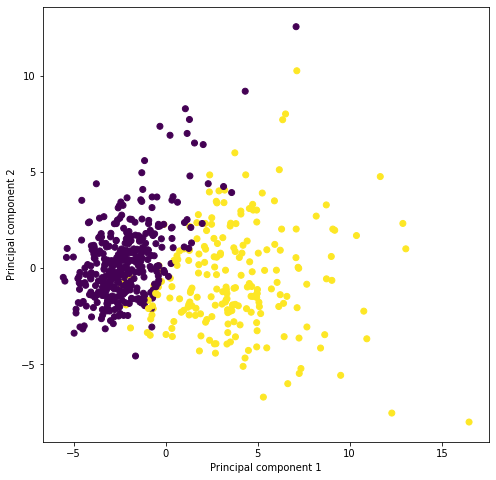

In [16]:
plot.figure(figsize=(8,8))
plot.scatter(x_pca[:,0],x_pca[:,1],c=target_data)
plot.xlabel('Principal component 1')
plot.ylabel('Principal component 2')

In [17]:
pca.components_

array([[ 0.02291216,  0.21891302,  0.10384388,  0.22753491,  0.22104577,
         0.14241471,  0.2390673 ,  0.25828025,  0.26073811,  0.13797774,
         0.06414779,  0.20611747,  0.01741339,  0.21144652,  0.20307642,
         0.01467821,  0.1702884 ,  0.15354367,  0.18340675,  0.04241552,
         0.10249607,  0.22800935,  0.10451545,  0.23663734,  0.22493214,
         0.12782441,  0.20988456,  0.22860218,  0.2507462 ,  0.12267993,
         0.13156024],
       [-0.03406849, -0.2332714 , -0.0600442 , -0.214589  , -0.23066882,
         0.18642221,  0.15245473,  0.06054163, -0.03416739,  0.19068498,
         0.36653106, -0.1059357 ,  0.08954779, -0.08980704, -0.15277129,
         0.20318988,  0.23250336,  0.19684608,  0.12996518,  0.18355863,
         0.27958414, -0.21929604, -0.04550122, -0.19929599, -0.21898546,
         0.17256296,  0.14425364,  0.09852652, -0.00753437,  0.14261944,
         0.27570208]])

In [18]:
pca.explained_variance_ratio_

array([0.42864701, 0.18376792])

In [19]:
pca_3=PCA(n_components=3)
pca_3.fit(scaled_data)
x_pca_3=pca_3.transform(scaled_data)
x_pca_3.shape

(569, 3)

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df_cancer,target_data,random_state=1)

In [21]:
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [22]:
x_train=pca.transform(x_train)
x_test=pca.transform(x_test)

In [23]:
logreg=LogisticRegression(solver='lbfgs')
logreg.fit(x_train,y_train)

LogisticRegression()

In [24]:
logreg.score(x_test,y_test)

0.951048951048951

In [27]:
x_train,x_test,y_train,y_test=train_test_split(df_cancer,target_data,random_state=1)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [28]:
x_train=pca_3.transform(x_train)
x_test=pca_3.transform(x_test)

In [29]:
logreg=LogisticRegression(solver='lbfgs')
logreg.fit(x_train,y_train)

LogisticRegression()

In [30]:
logreg.score(x_test,y_test)

0.9370629370629371